# WordCloud 한글 / 영어

In [172]:
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
%matplotlib inline

import platform

# - 깨짐 방지
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

# 한글 폰트 깨짐 방지
if( platform.system() =='Darwin' ):
    rc( 'font', family='AppleGothic' )
elif( platform.system() == 'Windows' ):
    f_path='C:/Users/meteo/AppData/Local/Microsoft/Windows/Fonts/JALNAN.ttf'
    font_name= font_manager.FontProperties( fname=f_path ).get_name()
    rc('font',family=font_name)
else: 
    print('error')

In [173]:
text_list1 = []
with open('../Python_data/ds/data/e_keyw.txt', 'r', encoding='cp949') as f:
    text1 = f.readlines()
    for x in text1:
        text_list1.append(x.replace('\n', '').split(';'))

In [174]:
text_list_join1 = []
for x in text_list1:
    text_list_join1.append(' '.join(x))

In [175]:
preprocessed_text1 = ' '.join(text_list_join1)

In [176]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

stopwords = set(STOPWORDS)

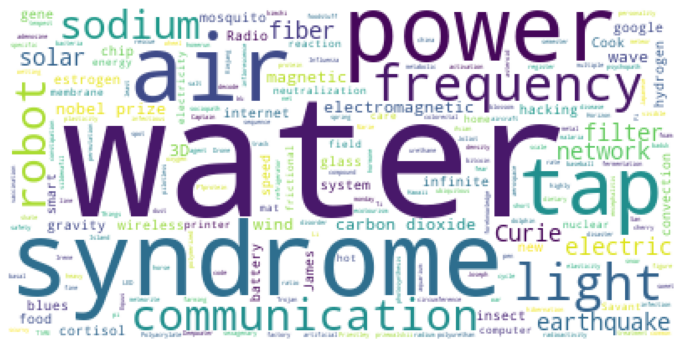

In [177]:
# WordCloud의 margin 옵션은 글자간 거리를 조절한다.
wc1 = WordCloud(background_color='white', stopwords=stopwords).generate(preprocessed_text1)
plt.figure(figsize=(12,12))
plt.imshow(wc1)
plt.axis('off')
plt.show()

In [178]:
text_list2 = []
with open('../Python_data/ds/data/k_keyw.txt', 'r', encoding='utf-8-sig') as f:
    text2 = f.readlines()
    for x in text2:
        text_list2.append(x.replace('\n', '').split(';'))

In [179]:
text_list_join2 = []
for x in text_list2:
    text_list_join2.append(' '.join(x))

In [180]:
preprocessed_text2 = ' '.join(text_list_join2)

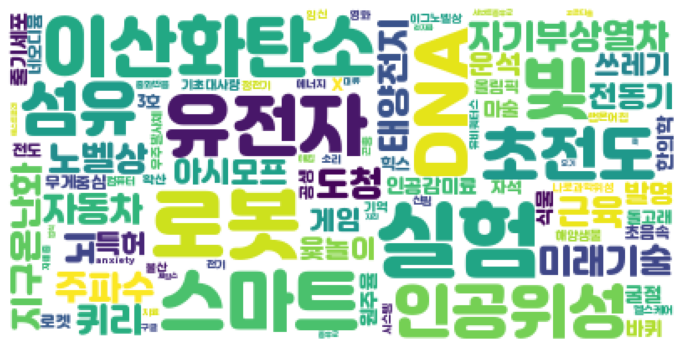

In [181]:
wc2 = WordCloud(background_color='white', stopwords=stopwords, font_path=f_path).generate(preprocessed_text2)
plt.figure(figsize=(12,12))
plt.imshow(wc2)
plt.axis('off')
plt.show()

# 웹 스크래핑된 검색어로 워드클라우드 만들기

In [182]:
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from urllib.request import urlopen
from tqdm import tqdm
from PIL import Image
import urllib
import time

In [98]:
# 스크래핑이 되는지 테스트
# quote = urllib.parse.quote()는 아스키코드가 아닌 글자를 URL 형식으로 인코딩 
base_url = 'https://search.naver.com/search.naver?where=kin'
sub_url = "&query={key_word}&kin_start={num}"
url = base_url + sub_url

response = urlopen(url.format(num=1, key_word=urllib.parse.quote('부모님 선물')))
soup = BeautifulSoup(response, 'html.parser')
tmp_test = soup.find_all('a', class_='api_txt_lines answer_text')

tmp_list = []
for line in tmp_test:
    tmp_list.append(line.get_text())
    
len(tmp_list)

10

In [130]:
base_url = 'https://search.naver.com/search.naver?where=kin'
sub_url = "&query={key_word}&kin_start={num}"
url = base_url + sub_url

present_text = []
for n in tqdm(range(1, 10000, 10)):
    response = urlopen(url.format(num=n, key_word=urllib.parse.quote('부모님 선물')))
    soup = BeautifulSoup(response, 'html.parser')
    tmp = soup.find_all('a', class_='api_txt_lines answer_text')

    for line in tmp:
        present_text.append(line.get_text())
    time.sleep(0.5)
    


100%|██████████| 1000/1000 [14:08<00:00,  1.18it/s]


In [183]:
len(present_text)

10000

In [184]:
from konlpy.tag import Okt
import nltk
okt = Okt()

In [185]:
present_text_1 = ''

for x in tqdm(present_text):
    present_text_1 += x + '\n'


100%|██████████| 10000/10000 [00:00<00:00, 53714.87it/s]


In [186]:
tokens_ko = okt.morphs(present_text_1)

In [187]:
ko = nltk.Text(tokens_ko, name='부모님 선물')
ko.vocab().most_common(100)

[('선물', 21141),
 ('.', 15233),
 ('이', 11426),
 ('부모님', 10794),
 ('에', 10720),
 ('을', 10611),
 ('\n', 10000),
 ('...', 7870),
 (',', 7572),
 ('도', 6692),
 ('은', 6317),
 ('가', 5867),
 ('것', 5190),
 ('좋은', 4911),
 ('로', 4847),
 ('다른', 4724),
 ('는', 4428),
 ('~', 4404),
 ('고민', 4115),
 ('추천', 4000),
 ('입니다', 3667),
 ('한', 3030),
 ('나', 2952),
 ('많이', 2940),
 ('합니다', 2796),
 ('게', 2789),
 ('현금', 2755),
 ('라고', 2729),
 ('꽃바구니', 2706),
 ('?', 2700),
 ('드려', 2667),
 ('사진', 2557),
 ('하고', 2475),
 ('마음', 2361),
 ('오랫동안', 2349),
 ('하세요', 2329),
 ('이라고', 2247),
 ('저', 2196),
 ('너무', 2000),
 ('영', 1987),
 ('^^', 1980),
 ('양제', 1976),
 ('안녕하세요', 1946),
 ('생각', 1928),
 ('!', 1909),
 ('면', 1907),
 ('일', 1893),
 ('..', 1873),
 ('생신', 1868),
 ('의미', 1860),
 ('하나', 1859),
 ('않아요', 1859),
 ('한번', 1856),
 ('남자친구', 1844),
 ('이번', 1839),
 ('옷', 1836),
 ('알려', 1834),
 ('마다', 1832),
 ('면역', 1831),
 ('해도', 1815),
 ('엔', 1814),
 ('여자', 1813),
 ('아이템', 1813),
 ('볼게요', 1811),
 ('찾아', 1810),
 ('작은', 1809),
 ('솔직히',

In [339]:
stopwords = '. 이 에 을 \n ... , 도 은 가 것 로 는 ~ 입니다 한 나 많이 합니다 그 드리는 가격 다른 게 라고 ? 드려 하고 마음 하세요 이라고 저 너무 영 ^^ 안녕하세요 찾아 볼게요 드려도 오랫동안 ! 면 일 .. 않아요 알려 마다 하시네요 드시는게 들 때 이번 엔\
    요 특별한 그때 하잖아요 에서 해서 인 해드리는것도 남을만한 대 만 요즘 / 드립니다 로는 드시는 년 잘 남기면 달아주시더라구요 https://bit.ly/3312Y1Z 답글 입력 같아요 있는 처럼 때문 께 못 이라 3 20 보다 없죠 제 건 그리고 ^ 를 스럽지 좀 슬 아\
    그럴 신다면 그런 무조건 께서 양재 의 저희 하는 계시군요 누구 걸 해드린 문구로 - ...? 오시 사시 말고 ^^* 드릴건데 해줘도 될까 더 > 드리는데요 가능하구요 16 _ 하시더라구요 되 쪽 분 있습니다 좋겠군요 꼬박꼬박 ^^? 싫어하지 비싸시면 않은것 력 원 -- 으로 좋다고\
    보세요 그냥 줄 손발 먹는건 생으로 알았는데 달여 속이 따뜻해 해드린다 져서 따듯해지고 올라간다 따뜻해지고 신기하게 편해져서 낫다 http 님 드려요 질문 자 전 답변 인데 곳 남겨 자주 &'
stopwords = stopwords.split(' ')
stopwords[:5]

['.', '이', '에', '을', '\n']

In [340]:
tokens_ko = [each_word for each_word in tokens_ko if each_word not in stopwords]
ko = nltk.Text(tokens_ko, name='부모님 선물')
ko.vocab().most_common(100)

[('선물', 21141),
 ('부모님', 10794),
 ('좋은', 4911),
 ('고민', 4115),
 ('추천', 4000),
 ('현금', 2755),
 ('꽃바구니', 2706),
 ('사진', 2557),
 ('양제', 1976),
 ('생각', 1928),
 ('생신', 1868),
 ('의미', 1860),
 ('하나', 1859),
 ('한번', 1856),
 ('남자친구', 1844),
 ('옷', 1836),
 ('면역', 1831),
 ('해도', 1815),
 ('여자', 1813),
 ('아이템', 1813),
 ('작은', 1809),
 ('솔직히', 1809),
 ('거리', 1807),
 ('챙겨야', 1803),
 ('산삼', 1697),
 ('이용', 1568),
 ('등', 1536),
 ('건강', 1250),
 ('제품', 1150),
 ('식품', 1079),
 ('딸', 1079),
 ('넥타이', 1076),
 ('마사지', 1020),
 ('부담', 1009),
 ('장', 990),
 ('이벤트', 986),
 ('비타민', 983),
 ('눈', 975),
 ('다양한', 970),
 ('간', 968),
 ('예쁘네요', 966),
 ('밀크', 962),
 ('유산균', 962),
 ('참고', 961),
 ('씨', 961),
 ('루테', 961),
 ('오픈', 960),
 ('사용', 958),
 ('저렴하게', 953),
 ('안마', 944),
 ('어떠세요', 943),
 ('편지', 940),
 ('같습니다', 939),
 ('최고', 939),
 ('직접', 937),
 ('있고', 935),
 ('판매', 934),
 ('머그컵', 924),
 ('라면', 923),
 ('향수', 917),
 ('액자', 917),
 ('포토', 915),
 ('살', 912),
 ('의자', 912),
 ('필요한', 912),
 ('겨울', 912),
 ('계속', 911),
 ('봅니다', 9

In [341]:
data = ko.vocab().most_common(100)

In [342]:
present_mask = np.array(Image.open('../Python_data/DS/data/선물.png'))
image_colors = ImageColorGenerator(present_mask)

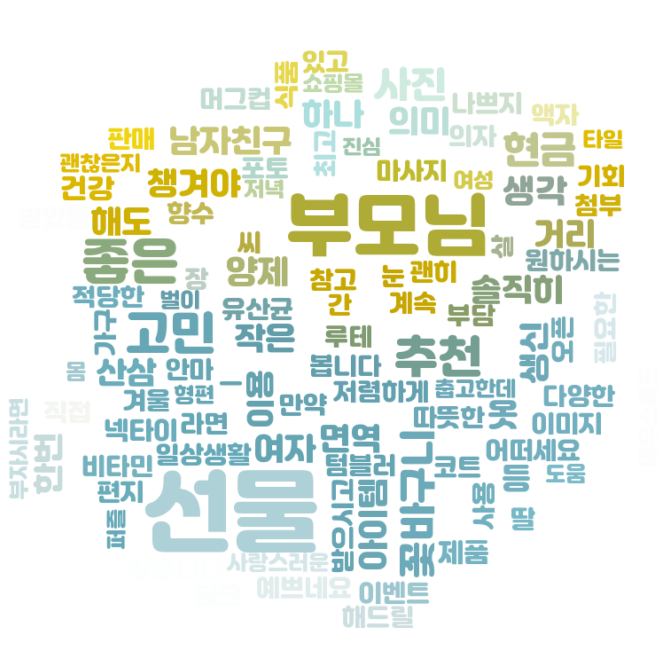

In [343]:
# WordCloud
wc = WordCloud(background_color='white', font_path=f_path, max_words=2000, mask=present_mask,
            min_font_size=1, max_font_size=100).generate_from_frequencies(dict(data))
default_colors = wc.to_array()

plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()